### 无限网格

策略逻辑：
- 假设初始资金量为w0，网格数量为n_grid，网格距离为d_grid，maker交易手续费为tx
- 初始每个网格, limit单的资金量为 w0/n_grid
- 根据当前1分钟的close价格（c_t0），设置网格【上下摆limit单】
- 下1分钟的close(c_t1)和c_t0之间的limit单，视为成交
- 记录当前仓位w_t1，每一次价格变化，网格重新发生变化。
- 不平仓


In [1]:
import os 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

from IPython.utils import io
from functions_processing_data import get_data
from bt_grid import * 
# from bt_grid_noprint import * 

In [2]:
file_name = "binance_futures_BTCUSDT_20200101_20220322.csv"
df_data = get_data(file_name)
df_data = df_data.loc[df_data.index > pd.to_datetime("2021/6/1"), :]
df_data

,open,high,low,close,volume
Time,,,,,
2021-06-01 00:01:00,37107.13,37237.60,37107.00,37172.49,976.822
2021-06-01 00:02:00,37172.49,37451.19,37172.49,37446.32,1175.449
2021-06-01 00:03:00,37446.49,37650.00,37420.70,37597.04,2620.040
2021-06-01 00:04:00,37596.95,37609.74,37507.02,37609.05,1012.639
2021-06-01 00:05:00,37609.05,37660.00,37541.14,37619.52,1177.270
...,...,...,...,...,...
2022-03-21 23:56:00,41044.00,41045.00,41037.40,41045.00,17.962
2022-03-21 23:57:00,41045.00,41051.20,41037.50,41037.60,37.729
2022-03-21 23:58:00,41037.60,41037.60,41032.30,41033.70,13.073


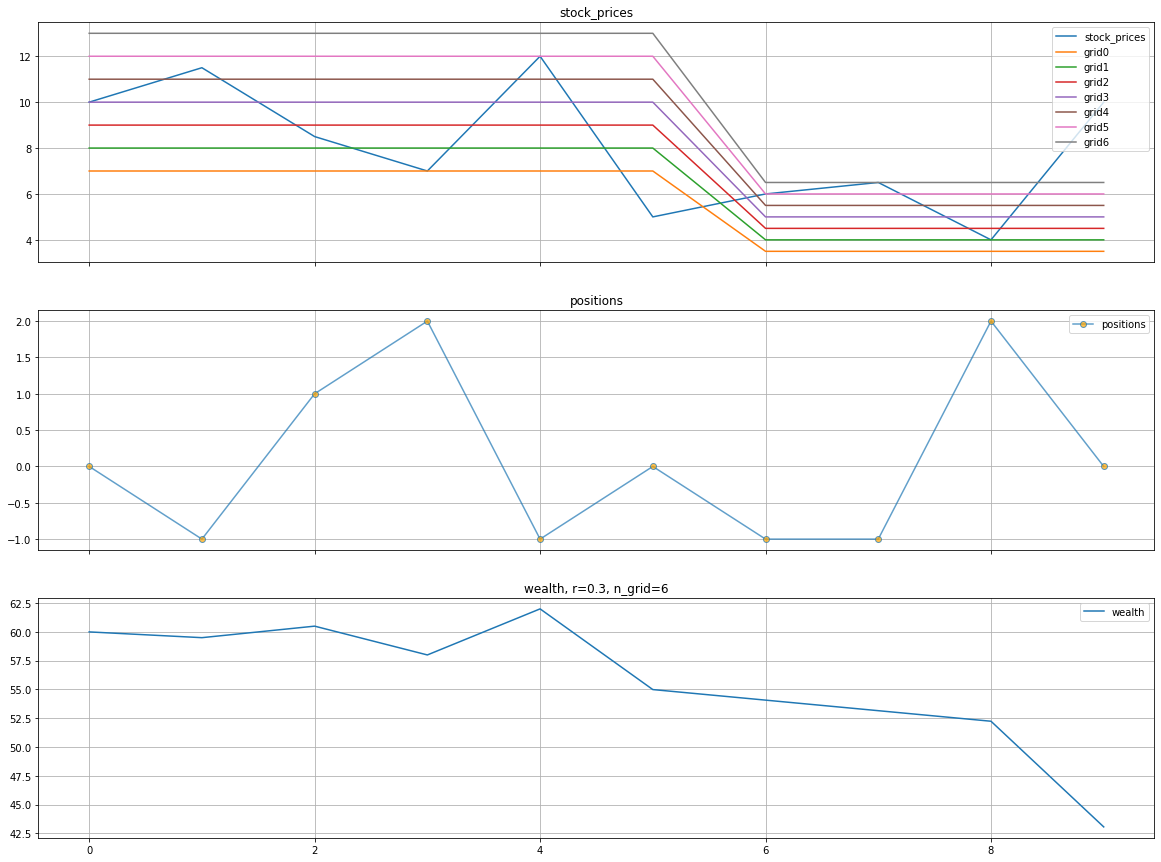

In [5]:
# 策略参数
w0 = 60
r = 0.3
n_grid = 6
tp = "arth"
data = pd.Series(np.array([10, 11.5, 8.5, 7, 12, 5, 6, 6.5, 4, 10]))
# data = pd.Series(np.array([10, 11.5, 8.5, 7, 12, 5, 6]))
# data = pd.Series(np.array([10, 9.5, 10.5, 10.5, 9.5]))

# test 
static_grid_bt = StaticGridBT(w0, r, n_grid, tp, data, is_trading_even=False, is_reverse_trading=False, tx_m=0, tx_t=0.0002)

with io.capture_output() as captured: # this will supress (e.g. capture) stdout and stderr
    static_grid_bt.run_on_bar()
static_grid_bt.plot_results()

In [6]:
static_grid_bt.wealth

0    60.000000
1    59.500000
2    60.500000
3    58.000000
4    62.000000
5    54.993200
6    54.076533
7    53.159867
8    52.243200
9    43.068100
dtype: float64

In [4]:
static_grid_bt.wealth

0    60.000000
1    59.500000
2    60.500000
3    58.000000
4    62.000000
5    54.993200
6    54.076647
7    53.160093
8    52.243540
9    43.069574
dtype: float64

--------------------------------------------------------------------------------
1
current_price: 11.5
last_price: 10.0
last_position: 0
current price direction: 1
[11.]
current transactions: [11.]
last transactions: [10.]
transactions_volume: -1
avg_transactions_price: 11.0
current_position: -1
60
p&l: -0.5
current_wealth: 59.5
transactions cost: 0.0
--------------------------------------------------------------------------------
2
current_price: 8.5
last_price: 11.5
last_position: -1
current price direction: -1
[ 9. 10. 11.]
current transactions: [ 9. 10.]
last transactions: [11.]
transactions_volume: 2
avg_transactions_price: 9.5
current_position: 1
59.5
p&l: 1.0
current_wealth: 60.5
transactions cost: 0.0
--------------------------------------------------------------------------------
3
current_price: 7.0
last_price: 8.5
last_position: 1
current price direction: -1
[8.]
current transactions: [8.]
last transactions: [ 9. 10.]
transactions_volume: 1
avg_transactions_price: 8.0
curren

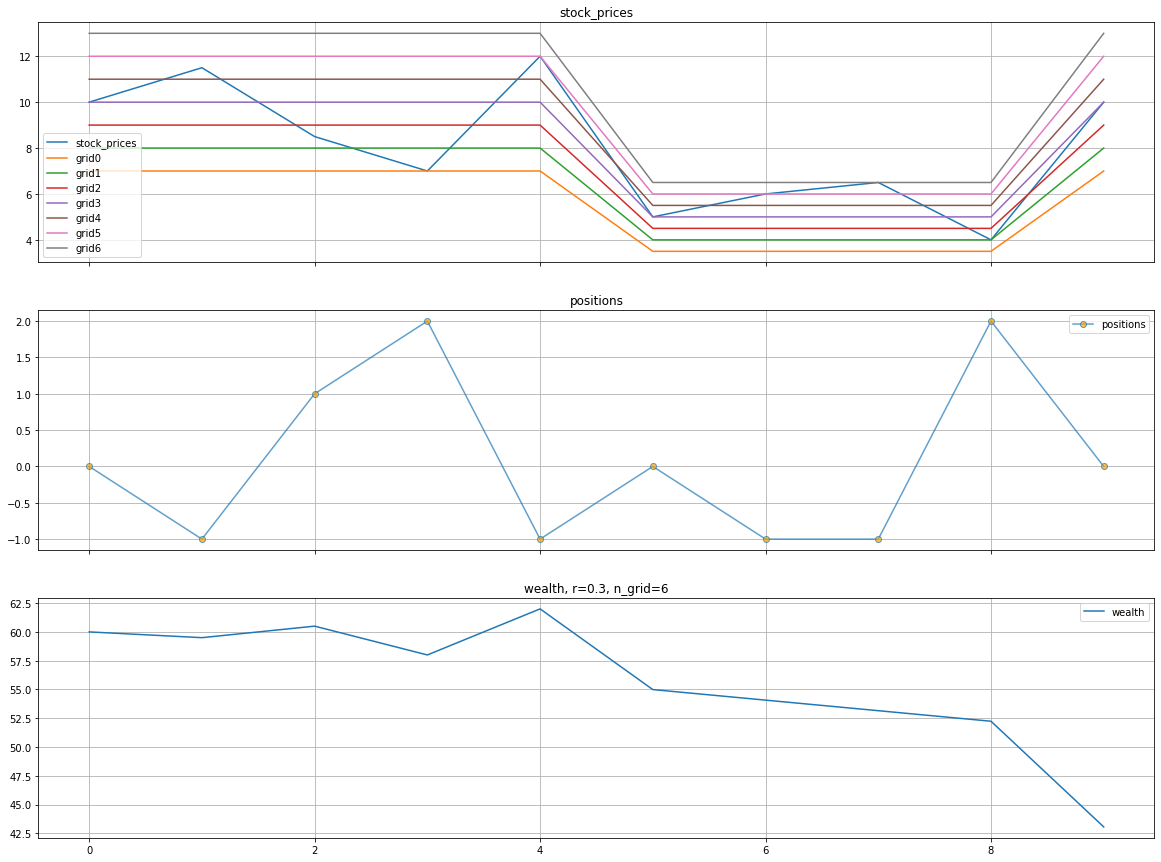

In [5]:
# 策略参数
w0 = 60
r = 0.3
n_grid = 6
tp = "arth"
data = pd.Series(np.array([10, 11.5, 8.5, 7, 12, 5, 6, 6.5, 4, 10]))
# data = pd.Series(np.array([10, 11.5, 8.5, 7, 12, 5, 6]))
# data = pd.Series(np.array([10, 9.5, 10.5, 10.5, 9.5]))

# test 
static_grid_bt = StaticGridBT(w0, r, n_grid, tp, data, is_trading_even=False, is_reverse_trading=False, tx_m=0, tx_t=0.0002)

# with io.capture_output() as captured: # this will supress (e.g. capture) stdout and stderr
    # static_grid_bt.run_on_bar()
static_grid_bt.run_on_bar()
static_grid_bt.plot_results()